In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)  

606

In [3]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

url = f"{base_url}appid={weather_api_key}&units={units}&q="  

lat = []  
lon= []
temp = [] 
hum = []     #emptylist
cloud = [] 
wind = [] 
country = [] 
dt = [] 
it = [] 
testing = []
print('Beginning Data Retrieval') 
print('----------------------------')
for i in range(len(cities)):  
    try:
        city = cities[i]                                     #run through every city
        response = requests.get(url + city).json() 
    
        lat.append(response['coord']['lat'])  
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max']) 
        hum.append(response['main']['humidity']) 
        cloud.append(response['clouds']['all'])           #append empty lists
        wind.append(response['wind']['speed']) 
        country.append(response['sys']['country']) 
        dt.append(response['dt']) 
        it.append(i) 
        testing.append(city)
        print('Processing City Number ' +  str( it[-1]+1) + " : "+ city)    

    except KeyError:
        print("Oops, that doesn't exist.")

Beginning Data Retrieval
----------------------------
Processing City Number 1 : punta arenas
Oops, that doesn't exist.
Processing City Number 3 : broome
Processing City Number 4 : ucluelet
Processing City Number 5 : upernavik
Processing City Number 6 : ilulissat
Oops, that doesn't exist.
Processing City Number 8 : san mateo del mar
Processing City Number 9 : ushuaia
Processing City Number 10 : vasilika
Processing City Number 11 : kapaa
Processing City Number 12 : pierre
Oops, that doesn't exist.
Processing City Number 14 : nizhniy kuranakh
Processing City Number 15 : chuy
Processing City Number 16 : orbetello
Processing City Number 17 : dikson
Processing City Number 18 : taoudenni
Processing City Number 19 : east london
Oops, that doesn't exist.
Processing City Number 21 : bubaque
Processing City Number 22 : barrow
Processing City Number 23 : tasiilaq
Processing City Number 24 : camacupa
Processing City Number 25 : tooele
Processing City Number 26 : varzelandia
Processing City Number 

Processing City Number 225 : curaca
Processing City Number 226 : estelle
Processing City Number 227 : aklavik
Processing City Number 228 : rantepao
Processing City Number 229 : zapolyarnyy
Processing City Number 230 : deer lake
Processing City Number 231 : abu kamal
Processing City Number 232 : san vicente
Processing City Number 233 : russellville
Processing City Number 234 : north vanlaiphai
Processing City Number 235 : auki
Processing City Number 236 : veraval
Processing City Number 237 : castro
Processing City Number 238 : flin flon
Processing City Number 239 : margate
Processing City Number 240 : west wendover
Processing City Number 241 : nchelenge
Processing City Number 242 : karpathos
Oops, that doesn't exist.
Processing City Number 244 : constitucion
Processing City Number 245 : atar
Processing City Number 246 : ballina
Processing City Number 247 : sao joao da barra
Processing City Number 248 : sur
Oops, that doesn't exist.
Processing City Number 250 : stornoway
Oops, that doesn

Processing City Number 446 : nuuk
Processing City Number 447 : jenks
Processing City Number 448 : tahta
Processing City Number 449 : shelburne
Processing City Number 450 : siniscola
Processing City Number 451 : storforshei
Processing City Number 452 : gweta
Oops, that doesn't exist.
Processing City Number 454 : kouqian
Processing City Number 455 : kisangani
Processing City Number 456 : matay
Processing City Number 457 : tilichiki
Processing City Number 458 : conceicao do araguaia
Processing City Number 459 : tarakan
Processing City Number 460 : grand-santi
Processing City Number 461 : lamar
Processing City Number 462 : marzuq
Processing City Number 463 : pontianak
Processing City Number 464 : baculin
Processing City Number 465 : airai
Processing City Number 466 : srivardhan
Processing City Number 467 : sharhorod
Processing City Number 468 : buchanan
Processing City Number 469 : inhambane
Processing City Number 470 : lompoc
Processing City Number 471 : challans
Processing City Number 47

In [4]:
#dictionary 
weather_dict = { 
    "City":testing,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp, 
    "Humidity": hum ,
    "cloudiness": cloud, 
    "Wind Speed": wind, 
    "Country": country,
    "Date": dt,
} 

weather_data = pd.DataFrame(weather_dict)   #put dict in DF


save = weather_data['Lat']
weather_data

,City,Lat,Lng,Max Temp,Humidity,cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,44.60,75,75,5.82,CL,1604023820
1,broome,42.25,-75.83,43.00,93,90,10.29,US,1604023981
2,ucluelet,48.93,-125.55,54.00,93,100,1.99,CA,1604023774
3,upernavik,72.79,-56.15,22.91,97,100,5.03,GL,1604023837
4,ilulissat,69.22,-51.10,19.40,73,69,3.36,GL,1604023816
...,...,...,...,...,...,...,...,...,...
559,dudinka,69.41,86.18,8.24,92,90,12.44,RU,1604024058
560,mabaruma,8.20,-59.78,76.57,93,100,3.62,GY,1604024058
561,bonga,7.28,36.23,56.50,81,97,1.79,ET,1604024058
562,namatanai,-3.67,152.43,81.75,76,99,8.93,PG,1604023857


In [5]:
#export CSV 
weather_data.to_csv(output_data_file)

In [6]:
weather_data = weather_data.drop(['Country'], axis = 1)
weather_data = weather_data.drop(['City'], axis = 1)

count = weather_data.count()
mean = weather_data.mean()                 #summary statistics, do we ned this?
stddev = weather_data.std() 
minimum = weather_data.min()  
maximum = weather_data.max()

quartiles = weather_data.quantile([.25,.5,.75])

count = count.to_frame() 
mean = mean.to_frame() 
stddev = stddev.to_frame()
minimum = minimum.to_frame()       #change from series too frame 
maximum = maximum.to_frame()

count = count.T  
mean = mean.T                         #transpose 
stddev = stddev.T 
minimum = minimum.T 
maximum = maximum.T

new = count.append(mean)            #add rows
new2 = new.append(stddev)  
new3 = new2.append(minimum)
new4 = new3.append(quartiles) 
new5 = new4.append(maximum) 

new5 
new5.reset_index(drop=True, inplace=True)
new5.rename({0: 'count', 1: 'mean',2: 'std',3: 'min',4: '25%',5:'50%',6: '75%', 7: 'max'}, axis='index')


,Lat,Lng,Max Temp,Humidity,cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.00000,564.000000,564.000000,5.640000e+02
mean,18.494184,16.273333,58.055390,74.04078,52.971631,7.549273,1.604024e+09
std,33.288096,89.996822,22.135541,20.67236,41.405965,5.439824,1.168899e+02
min,-54.800000,-179.170000,-7.890000,6.00000,0.000000,0.310000,1.604023e+09
25%,-9.372500,-60.440000,44.600000,65.75000,1.000000,3.360000,1.604024e+09
50%,20.895000,20.680000,62.745000,80.00000,64.000000,6.585000,1.604024e+09
75%,46.560000,90.290000,76.800000,90.00000,97.000000,10.290000,1.604024e+09
max,78.220000,179.320000,96.800000,100.00000,100.000000,33.330000,1.604024e+09


In [7]:

#only keep where Humidity is less than 100 
#remove cities humidity >100
df = weather_data

criteria = df[ df['Humidity'].to_frame().iloc[:] <= 100 ]      #erase humidity >100
weather_data['Humidity'] = criteria['Humidity']
weather_data  
weather_data = weather_data.dropna()
weather_data

,Lat,Lng,Max Temp,Humidity,cloudiness,Wind Speed,Date
0,-53.15,-70.92,44.60,75,75,5.82,1604023820
1,42.25,-75.83,43.00,93,90,10.29,1604023981
2,48.93,-125.55,54.00,93,100,1.99,1604023774
3,72.79,-56.15,22.91,97,100,5.03,1604023837
4,69.22,-51.10,19.40,73,69,3.36,1604023816
...,...,...,...,...,...,...,...
559,69.41,86.18,8.24,92,90,12.44,1604024058
560,8.20,-59.78,76.57,93,100,3.62,1604024058
561,7.28,36.23,56.50,81,97,1.79,1604024058
562,-3.67,152.43,81.75,76,99,8.93,1604023857


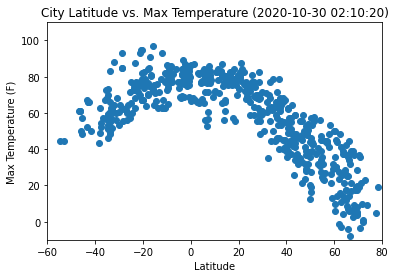

This scatter plot shows the relationship between city latitude and max temperature. The highest max temperatures are around the equater (0 Latitude)


In [8]:
 #change date format 
from datetime import datetime
ts = int(weather_data['Date'][0])
date = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

# lat v temp 
x = weather_data['Lat'] 
y = weather_data['Max Temp']  
plt.xlim(-60,80) 
plt.ylim(-10,110)
plt.scatter(x,y)  
plt.title('City Latitude vs. Max Temperature ' + '('+str(date)+')')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('scatter_latvtemp.png')
plt.show()   
print('This scatter plot shows the relationship between city latitude and max temperature. The highest max temperatures are around the equater (0 Latitude)')


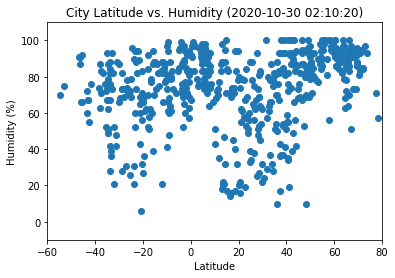

This scatter plot shows the relationship between city latitude and humidity. The majority of cities have a humidity within 60-100%. 


In [9]:
#lat v Humidity 
y = weather_data['Humidity']  
plt.xlim(-60,80) 
plt.ylim(-10,110)
plt.scatter(x,y)  
plt.title('City Latitude vs. Humidity '+ '('+str(date)+')') 
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('scatter_latvhumidity.png')
plt.show() 
print('This scatter plot shows the relationship between city latitude and humidity. The majority of cities have a humidity within 60-100%. ' )

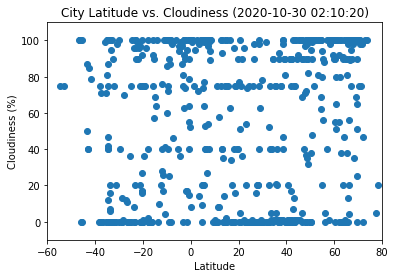

This scatter plot shows the relationship between city latitude and max cloudiness. There are clusters of data with cloudiness at about 0, 20, 40, 80, and 100%, across all latitudes.


In [10]:
#lat v cloudiness 
y = weather_data['cloudiness']  
plt.xlim(-60,80) 
plt.ylim(-10,110)
plt.scatter(x,y)  
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness '+ '('+str(date)+')') 
plt.savefig('scatter_latvcloudiness.png')
plt.show() 
print('This scatter plot shows the relationship between city latitude and max cloudiness. There are clusters of data with cloudiness at about 0, 20, 40, 80, and 100%, across all latitudes.') 

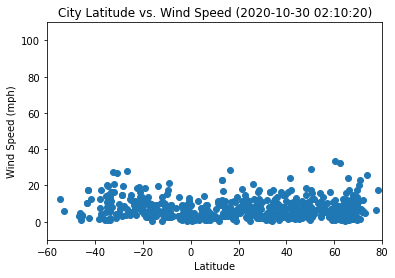

This scatter plot shows the relationship between wind speed and max temperature. Wind speed is consistently between 0-20%, despite the latitude. 


In [11]:
#lat v wind speed
y = weather_data['Wind Speed']  
plt.xlim(-60,80) 
plt.ylim(-10,110)
plt.scatter(x,y)  
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed '+ '('+str(date)+')')
plt.savefig('scatter_latvwindspeed.png')
plt.show() 
print('This scatter plot shows the relationship between wind speed and max temperature. Wind speed is consistently between 0-20%, despite the latitude. ')

In [12]:
#seperate northern and southern hemisphere >0 lat and <0 lat

df = weather_data



criteria = df[ df['Lat'].to_frame().iloc[:] < 0 ]   #southern hemisphere retrieval 
df['Lat'] = criteria['Lat']
southern  = df.dropna()

southern 

,Lat,Lng,Max Temp,Humidity,cloudiness,Wind Speed,Date
0,-53.15,-70.92,44.60,75,75,5.82,1604023820
6,-54.80,-68.30,44.60,70,75,12.75,1604023809
11,-33.70,-53.46,49.46,88,6,6.69,1604023555
15,-33.02,27.91,62.28,73,100,16.62,1604023824
19,-12.02,17.48,63.16,88,76,0.58,1604023984
...,...,...,...,...,...,...,...
544,-13.70,-76.22,63.00,82,0,19.46,1604023826
549,-0.61,-47.36,80.82,82,15,13.22,1604024057
550,-4.32,20.58,69.08,96,36,1.36,1604024057
551,-33.46,-70.65,62.60,39,0,11.41,1604023792


In [13]:

df = weather_data 
df['Lat'] = save


criteria = df[ df['Lat'].to_frame().iloc[:] >=0 ]      ## northern hemispher retrieval 
df['Lat'] = criteria['Lat']
northern  = df.dropna()

northern  




,Lat,Lng,Max Temp,Humidity,cloudiness,Wind Speed,Date
1,42.25,-75.83,43.00,93,90,10.29,1604023981
2,48.93,-125.55,54.00,93,100,1.99,1604023774
3,72.79,-56.15,22.91,97,100,5.03,1604023837
4,69.22,-51.10,19.40,73,69,3.36,1604023816
5,16.20,-95.00,80.91,71,100,28.43,1604023982
...,...,...,...,...,...,...,...
558,6.30,-10.80,77.00,94,40,7.29,1604024006
559,69.41,86.18,8.24,92,90,12.44,1604024058
560,8.20,-59.78,76.57,93,100,3.62,1604024058
561,7.28,36.23,56.50,81,97,1.79,1604024058


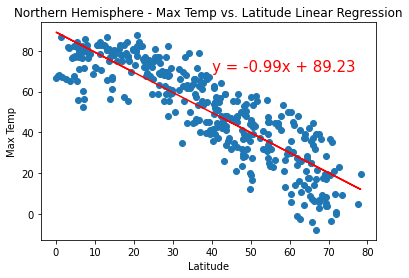

The r value is -0.8683508390047971


In [14]:
x = northern['Lat'] 
y = northern['Max Temp']             #lin regression model 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,70), fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
print('The r value is ' + str(rvalue))

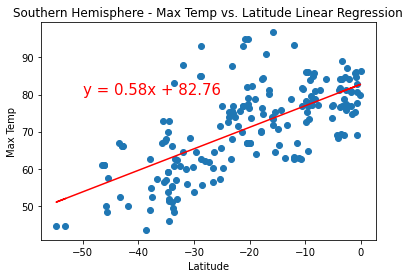

The r value is 0.6677537334963429


In [15]:
x = southern['Lat'] 
y = southern['Max Temp']         #lin regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,80), fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show() 
print('The r value is ' + str(rvalue))

The above linear regression plots are looking at the relationship between temperature and latitude for the northern and southern hemisphere. In the northern hemisphere, as the latitude increases (further from the equator), temperature decreases. In the southern hemisphere, as the latitude increases (move closer to the equator), the temperature increases. Intuitively, this makes sense.  

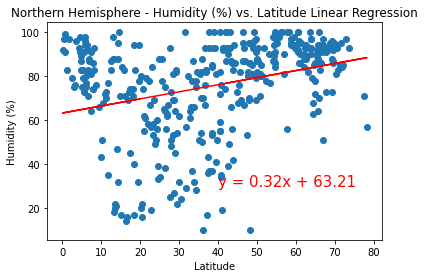

The r value is 0.30513621628960474


In [16]:
x = northern['Lat'] 
y = northern['Humidity'] #lin regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,30), fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()
print('The r value is ' + str(rvalue))

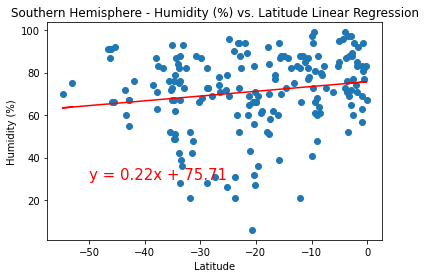

The r value is 0.1661033103137817


In [17]:
x = southern['Lat'] 
y = southern['Humidity']        #lin regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,30), fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()
print('The r value is ' + str(rvalue))

The above linear regression plots are looking at the relationship between humidity and latitude for the northern and southern hemisphere. In the northern hemisphere, as the latitude increases (further from the equator), humidity increases slightly. In the southern hemisphere, as the latitude increases (move closer to the equator), the humidity seems to increases ever so slightly and there may be little to no correlation to latitude (small r value).   

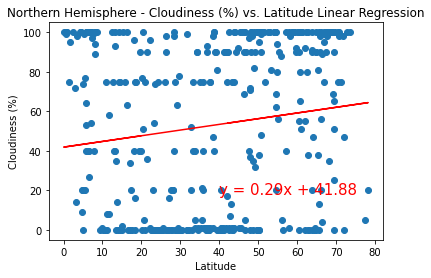

The r value is 0.14117199135778746


In [18]:
x = northern['Lat'] 
y = northern['cloudiness'] #lin regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,18), fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
print('The r value is ' + str(rvalue))

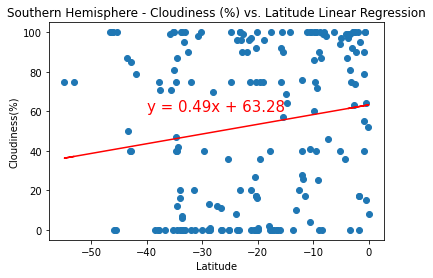

The r value is 0.16308402289679444


In [19]:
x = southern['Lat'] 
y = southern['cloudiness']   #lin regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,60), fontsize=15,color="red")
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
print('The r value is ' + str(rvalue))

The above linear regression plots are looking at the relationship between cloudiness and latitude for the northern and southern hemisphere. The r value for both plots are very low that it is hard to conclude if there is a relationship between cloudiness and latitude for either. 

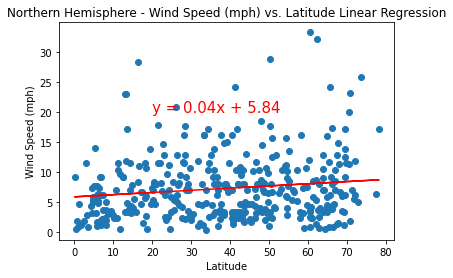

The r value is 0.13875982496338726


In [20]:
x = northern['Lat'] 
y = northern['Wind Speed']           #lin regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,20), fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
print('The r value is ' + str(rvalue))

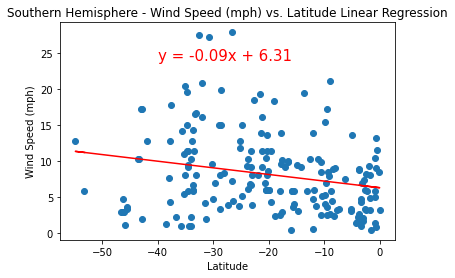

The r value is -0.22448554969082415


In [21]:
x = southern['Lat'] 
y = southern['Wind Speed']    #lin regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,24), fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
print('The r value is ' + str(rvalue))

The above linear regression plots are looking at the relationship between wind speed and latitude for the northern and southern hemisphere. In the northern hemisphere, as the latitude increases (further from the equator), the wind speed consitently stays in the same range. There seems to be no correlation between wind speed and latitiude in the northern hemisphere. In the southern hemisphere, as the latitude increases (move closer to the equator), the wind speed decreases